 Importing Libraries & Dataset



In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


Loading the Dataset

In [216]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("satyajeetrai/palmer-penguins-dataset-for-eda")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/palmer-penguins-dataset-for-eda


In [217]:
import os
print(os.listdir(path))

['penguins.csv']


In [218]:
df = pd.read_csv(path + "/penguins.csv")
df

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Preview of the Penguin Dataset(First 10 Rows)

In [219]:
df.head(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


Preview of the Penguin Dataset(Last 10 Rows)

In [220]:
df.tail(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
334,334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
335,335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
336,336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
337,337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


Statistical Summary of the Dataset

In [221]:
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


Data Type of Each Column

In [222]:
df.dtypes

,0
id,int64
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


Dataset Dimensions

In [223]:
df.shape

(344, 9)

Missing Values Count

In [224]:
df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


Dropping the missing value

In [225]:
df = df.dropna()
df

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Duplicate Value Counts

In [226]:
duplicated_rows_df =df[df.duplicated()]
print("number of duplicate rows:", duplicated_rows_df.shape)




number of duplicate rows: (0, 9)


Feature Removal

In [227]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

/tmp/ipython-input-227-1938229911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'], axis = 1, inplace = True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Null Values Counts

In [228]:
df.isnull().sum()


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


Dimensionality Reduction using PCA

In [229]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[-2.34141622,  1.35699934],
       [-2.17739398, -0.42921321],
       [-2.23869294, -0.30565303],
       [-2.68461389, -0.07687876],
       [-2.39712588,  1.90223338],
       [-2.58883771, -0.38326645],
       [-1.39443905,  1.8047271 ],
       [-2.62186049, -0.40880778],
       [-2.42477871,  2.06749232],
       [-2.06301135,  1.96393241],
       [-2.56195516, -0.47506905],
       [-2.40984677, -0.06260383],
       [-1.3859305 ,  2.24850936],
       [-3.10412797, -0.47968485],
       [-1.57298441,  2.58681832],
       [-2.03635459, -1.07027246],
       [-1.45135517,  0.53558581],
       [-1.52928249, -0.81218528],
       [-0.90121197,  0.45940791],
       [-0.97538219,  0.19812997],
       [-1.59358596, -0.92943663],
       [-1.14087183,  0.64271009],
       [-1.41007025, -1.07045326],
       [-2.31439685, -1.02802666],
       [-1.06171483,  0.79075564],
       [-2.1323475 , -1.10161753],
       [-1.82778554,  0.75446627],
       [-1.92754114, -0.76511818],
       [-1.47756111,

Train - Test Split and Shape Summary

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['species'], test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(266, 2)
(266,)
(67, 2)
(67,)


Fitting Logistic Regression on Training Data

In [231]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

Making Prediction on Test data

In [232]:
y_pred = model.predict(x_test)
y_pred

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo'], dtype=object)



*  Purpose - Show how strongly variable are related to each other


*  Range

      *   +1 : Perfect positive correlation
      *    0 : No correlation
      *   -1 : Perfect negayive correlation







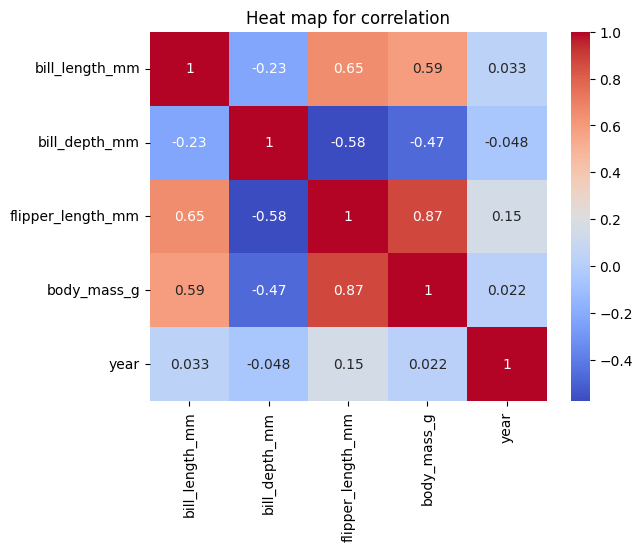

In [233]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Heat map for correlation')
plt.show()

The model performs better at identifying females than male

*  The model performs better at identifying females than male

*  only 5 male samples were correctly classified

*  More females(33) were classfied correctly


*   List item





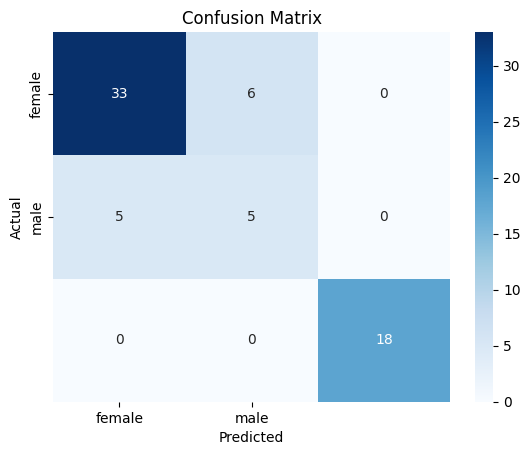

In [234]:
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['female', 'male'], yticklabels =['female', 'male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 640x480 with 0 Axes>

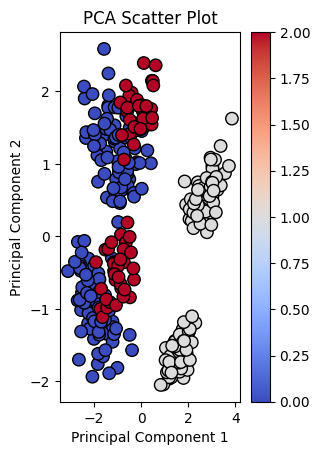

In [235]:
plt.tight_layout()
plt.show()
y_numeric = pd.factorize(y)[0]

plt.subplot(1,2,2)
plt.scatter(x_pca[:,0], x_pca[:,1], c = y_numeric, cmap = 'coolwarm', edgecolor='k', s = 80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar()

CONVERT CATEGORIAL TO NUMERIC

In [236]:


le = LabelEncoder()
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])
df['year'] = le.fit_transform(df['year'])
df.head()

/tmp/ipython-input-236-3227333764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = le.fit_transform(df['island'])
/tmp/ipython-input-236-3227333764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex'])
/tmp/ipython-input-236-3227333764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,1,0
1,Adelie,2,39.5,17.4,186.0,3800.0,0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1,0


In [237]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('species', axis = 1))
x_scaled

array([[ 1.88939197, -0.89604189,  0.7807321 , ..., -0.56847478,
         0.99103121, -1.28374201],
       [ 1.88939197, -0.82278787,  0.11958397, ..., -0.50628618,
        -1.00904996, -1.28374201],
       [ 1.88939197, -0.67627982,  0.42472926, ..., -1.1903608 ,
        -1.00904996, -1.28374201],
       ...,
       [ 0.48812799,  1.02687621,  0.52644436, ..., -0.53738048,
         0.99103121,  1.18015476],
       [ 0.48812799,  1.24663828,  0.93330475, ..., -0.13315457,
         0.99103121,  1.18015476],
       [ 0.48812799,  1.13675725,  0.7807321 , ..., -0.53738048,
        -1.00904996,  1.18015476]])

In [238]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Logictic Regression accuracy :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Logictic Regression accuracy : 0.835820895522388
[[33  6  0]
 [ 5  5  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       0.87      0.85      0.86        39
   Chinstrap       0.45      0.50      0.48        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.84        67
   macro avg       0.77      0.78      0.78        67
weighted avg       0.84      0.84      0.84        67



In [239]:
# SPLIT INTO FEATURE AND TARGET

x = df.drop(['species'], axis = 1)
y = df['species']

# Encode the target variable 'species'
le = LabelEncoder()
y = le.fit_transform(y)


# TRAIN_TEST_SPLIT

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_train

array([2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2,
       0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0,
       0, 2])



*  Bill_length_mm is the most important feature for prediction

*  Followed by bill_depth_mm and flipper_length_mm

*  Feature like island and body_mass_g have less influence



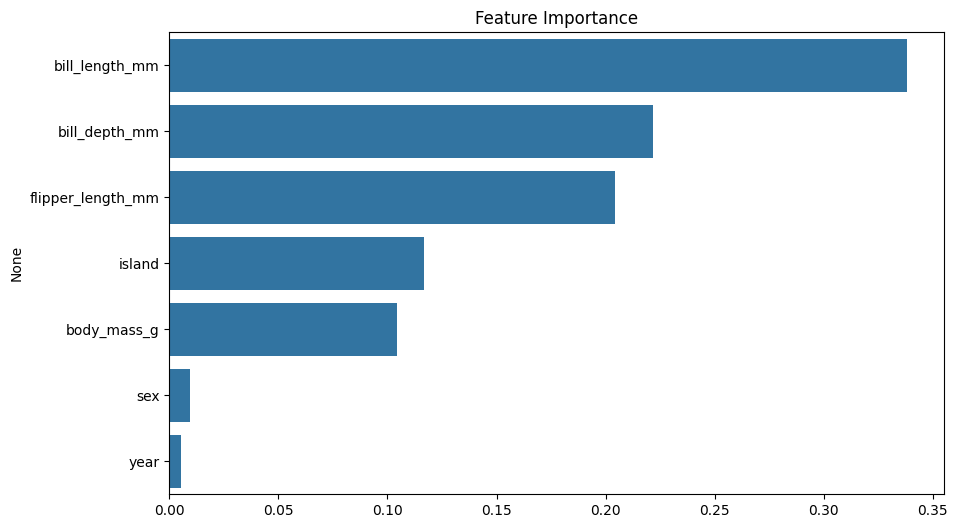

In [240]:
# RANDOM FOREST

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
feature = x.columns
indicea = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indicea], y=feature[indicea])
plt.title("Feature Importance")
plt.show()



*   The first bar represent the species with the highest count

*   The second bar represent a species with moderate count

*   The third bar has the lowest count




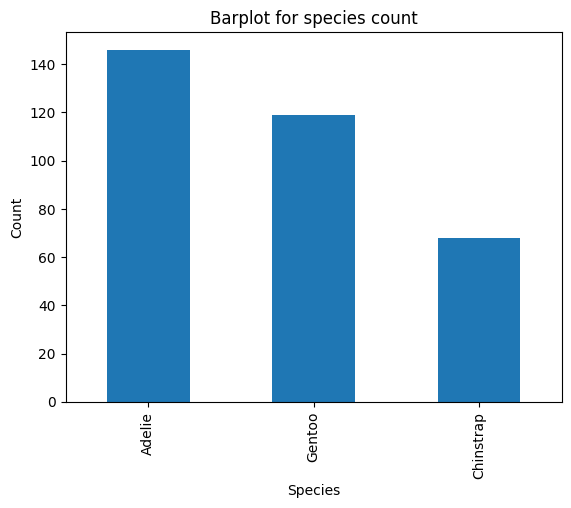

In [241]:
df['species'].value_counts().plot(kind = 'bar')
plt.title('Barplot for species count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


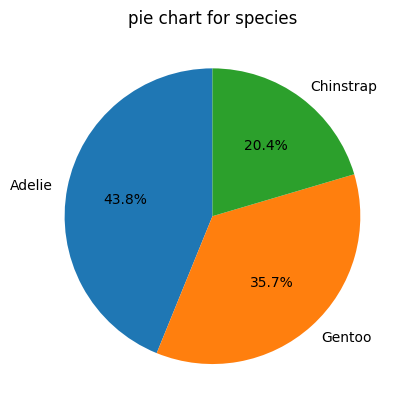

In [242]:
label = df['species'].value_counts().index
sizes = df['species'].value_counts().values
plt.pie(sizes, labels = label, autopct = '%1.1f%%', startangle=90)
plt.title('pie chart for species')
plt.show()

In [ ]:
for species in df['species'].unique():
  subset = df[df['species'] == species]
  plt.scatter(subset['bill_length_mm'], subset['bill_depth_mm'], label = species)
plt.title(" Bill length and Bill depth by species")
plt.xlabel('Bill length')
plt.ylabel('Bill depth')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

In [ ]:
sns.lineplot(x = 'bill_length_mm', y='bill_depth_mm', data=df, estimator= 'mean')
plt.title('Line Plot of Bill Length and Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
